# Analyzing 4 years of personnal running data
I am using Runkeeper as my fitness tracker since July 2012. I decided to take a look at my data.

In [1]:
%matplotlib inline
# Import useful packages
from __future__ import division
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
from pandas import *
import numpy as np
import seaborn as sns
import datetime as dt 

### Import training data

In [2]:
# Read the csv of my personal data to a DataFrame
Runkeeper_data = pd.read_csv('cardioActivities.csv')

In [3]:
# Quick look about the structure of my data
Runkeeper_data.head()

Date     Type  Route Name  Distance (km) Duration  \
0  2016-11-20 14:38:10  Running         NaN          14.72  1:12:36   
1  2016-11-08 21:04:17  Running         NaN          14.23  1:15:04   
2  2016-11-05 12:03:03  Running         NaN          11.69    56:41   
3  2016-11-03 21:07:07  Running         NaN           8.67    45:00   
4  2016-11-01 13:00:04  Running         NaN          10.34  1:02:03   

  Average Pace  Average Speed (km/h)  Calories Burned  Climb (m)  \
0         4:56                 12.16      1189.000000        326   
1         5:17                 11.37      1089.835188          0   
2         4:51                 12.37       865.000000        107   
3         5:11                 11.56       668.199746          0   
4         6:00                  9.99       824.000000        209   

   Average Heart Rate (bpm) Notes             GPX File  
0                       NaN   NaN  2016-11-20-1438.gpx  
1                       NaN   NaN                  NaN  
2                       NaN   NaN  2016-11-05-1203.gpx  
3                       NaN   NaN                  NaN  
4                       NaN   NaN  2016-11-01-1300.gpx

In [4]:
# See how many activities I have done by type
print("Activities by type:")
Runkeeper_data['Type'].value_counts()

Activities by type:


Running    233
Rowing      26
Cycling      3
Other        1
Name: Type, dtype: int64

### Data preprocessing

In [5]:
# Convert date to datetime format
Runkeeper_data['Date'] = pd.to_datetime(Runkeeper_data['Date'])

# Check if there is missing data in Distance column
print(Runkeeper_data[ Runkeeper_data['Distance (km)'].isnull() ])

# Filter only running data as it is my main activity
# Remove running data with distance = 0. 
Running_data = Runkeeper_data[ ( Runkeeper_data['Type'] == 'Running' ) & (Runkeeper_data['Distance (km)'] > 0 )  ]
Running_data.reset_index(inplace=True)

# Describe running data
Running_data.describe()

                  Date     Type  Route Name  Distance (km) Duration  \
56 2016-04-08 21:02:59  Running         NaN            NaN    35:14   

   Average Pace  Average Speed (km/h)  Calories Burned  Climb (m)  \
56          NaN                   NaN           50.736          0   

    Average Heart Rate (bpm) Notes GPX File  
56                       NaN   NaN      NaN  


index  Route Name  Distance (km)  Average Speed (km/h)  \
count  230.000000         0.0     230.000000            230.000000   
mean   127.213043         NaN      10.359783             11.857304   
std     77.124879         NaN       3.267064              1.075722   
min      0.000000         NaN       3.010000              7.780000   
25%     60.500000         NaN       8.707500             11.560000   
50%    122.500000         NaN      10.105000             11.975000   
75%    193.750000         NaN      12.270000             12.460000   
max    262.000000         NaN      21.730000             16.640000   

       Calories Burned    Climb (m)  Average Heart Rate (bpm)  
count       230.000000   230.000000                       0.0  
mean        821.759502   149.013043                       NaN  
std         261.299815   194.027065                       NaN  
min         237.931079     0.000000                       NaN  
25%         682.604849    44.500000                       NaN  
50%         812.092701   130.000000                       NaN  
75%         977.750000   187.500000                       NaN  
max        1671.000000  1828.000000                       NaN

In [6]:
# Convert Duration column to numeric
temp_data = Running_data['Duration'].str.split(':')

duration_data = []
for each_entry in temp_data:
    if len(each_entry) <= 2: 
        dur = each_entry[0]+'.'+each_entry[1] 
        duration_data.append(dur)
    else:
        key1 = (int(each_entry[0]) * 60) + int(each_entry[1])
        dur = str(key1)+'.'+each_entry[2]
        duration_data.append(dur)

Running_data.loc[:,['Duration']] = duration_data 
Running_data.loc[:,['Duration']] = pd.to_numeric(Running_data['Duration'])

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [7]:
# Convert Average Pace column to numeric
temp_data = Running_data['Average Pace'].str.split(':')

pace_data = []
for each_entry in temp_data:
    dur = each_entry[0]+'.'+ str( int(int(each_entry[1]) *10/6) )
    pace_data.append(dur)
        
Running_data.loc[:,['Average Pace']] = pace_data 
Running_data.loc[:,['Average Pace']] = pd.to_numeric(Running_data['Average Pace'])

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/pandas/core/indexing.py:476: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
# Calculate average distance and average calories burned for running data
avg_distance = Running_data['Distance (km)'].mean()
avg_cal_burned = Running_data['Calories Burned'].mean()

### Some stats about my running activities

In [9]:
print('Number of running activities: ', Running_data['Distance (km)'].count() )
print('Total distance in running: ', Running_data['Distance (km)'].sum(), ' km')
print('Average distance per running activity: ', (avg_distance.round(decimals=2)), ' km')
print('Average Calories burned per running activity: ',"{0:.0f}".format(avg_cal_burned) , ' Cal')

Number of running activities:  230
Total distance in running:  2382.75  km
Average distance per running activity:  10.36  km
Average Calories burned per running activity:  822  Cal


### Distribution of running distance
It seems that my sweet spots are 9, 10 and 12 kms

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


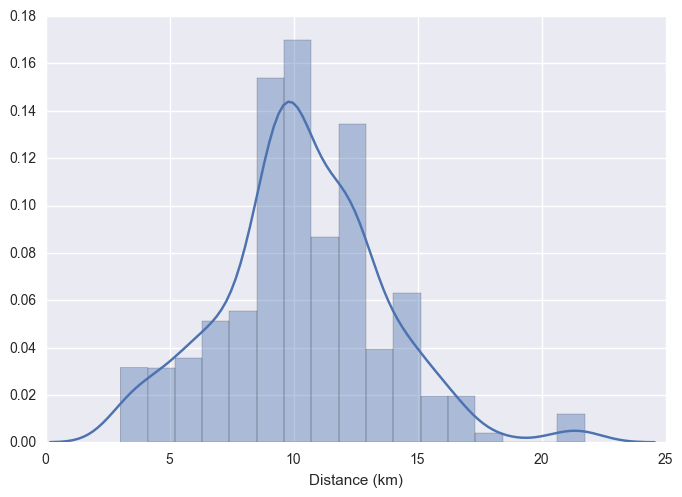

In [10]:
sns.distplot(Running_data['Distance (km)'])

### Distribution of running duration
My main training are between 50 and 60 minutes

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


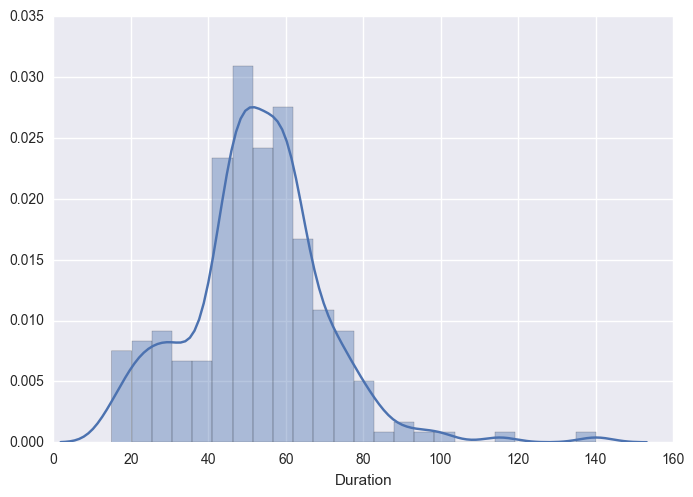

In [11]:
sns.distplot(Running_data['Duration'])

### Running distance by year

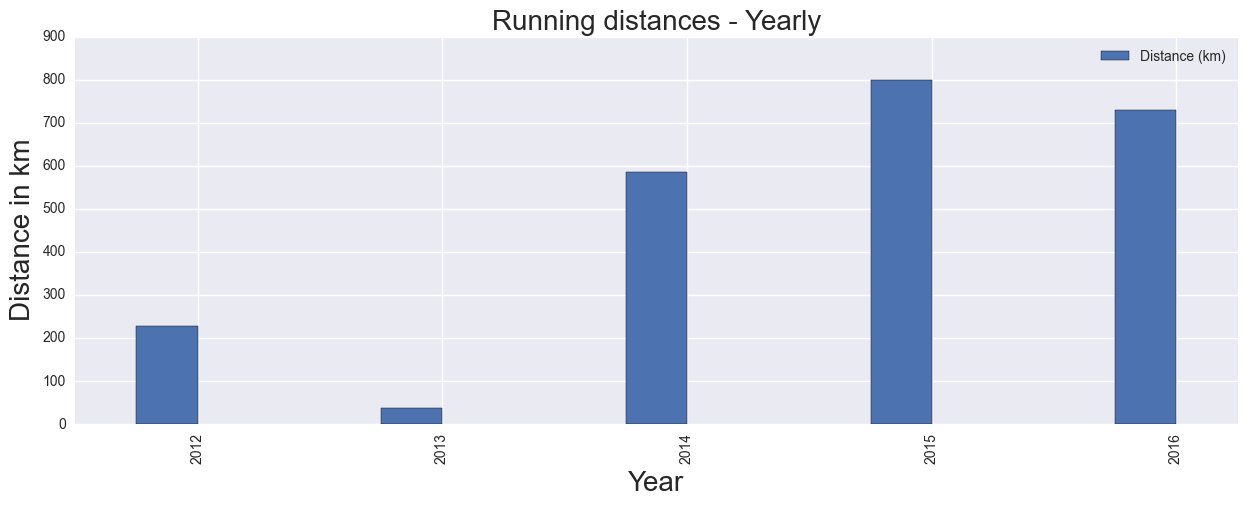

In [12]:
# Group data by year
r_yearly = Running_data['Date'].dt.to_period('A')

 
ax = pd.groupby(Running_data, r_yearly)['Distance (km)'].sum().plot(kind='bar',position=1,
                                                                    legend = True,width = .25, figsize = (15,5))

#Fontsize:
font_size=20;

ax.set_xlabel('Year', fontsize = font_size)
ax.set_ylabel('Distance in km',fontsize = font_size)
ax.set_title('Running distances - Yearly', fontsize = font_size)

### Running distance by month

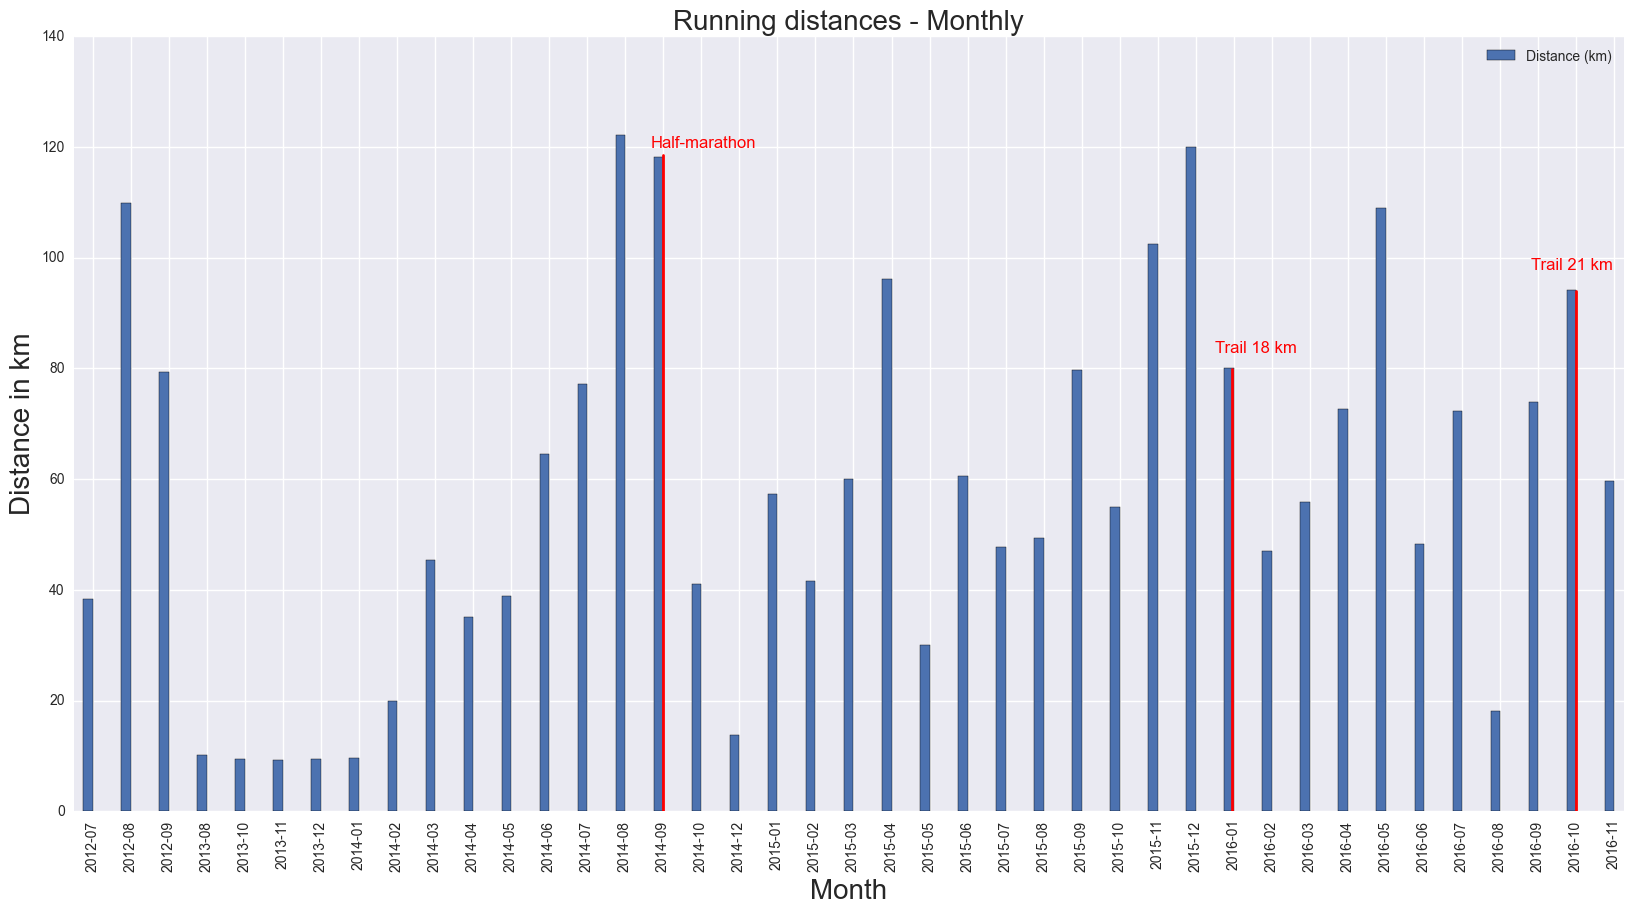

In [13]:
#Group data by month
r_monthly = Running_data['Date'].dt.to_period('M')

 
ax = pd.groupby(Running_data, r_monthly)['Distance (km)'].sum().plot(kind='bar',position=1,
                                                                    legend = True,width = .25, figsize = (20,10))

ax.set_xlabel('Month', fontsize = font_size)
ax.set_ylabel('Distance in km',fontsize = font_size)
ax.set_title('Running distances - Monthly', fontsize = font_size)

plt.axvline(x=15, ymin=0, ymax=18.4 / max(Running_data['Distance (km)']), linewidth=2,color='r')
plt.text(14.7, 120, 'Half-marathon',color='r')

plt.axvline(x=29.95, ymin=0, ymax=12.4 / max(Running_data['Distance (km)']), linewidth=2,color='r')
plt.text(29.5, 83, 'Trail 18 km',color='r')

plt.axvline(x=39, ymin=0, ymax=14.6 / max(Running_data['Distance (km)']), linewidth=2,color='r')
plt.text(37.8, 98, 'Trail 21 km',color='r')

### Distribution of speed (km/h)
Focus on data since 2014

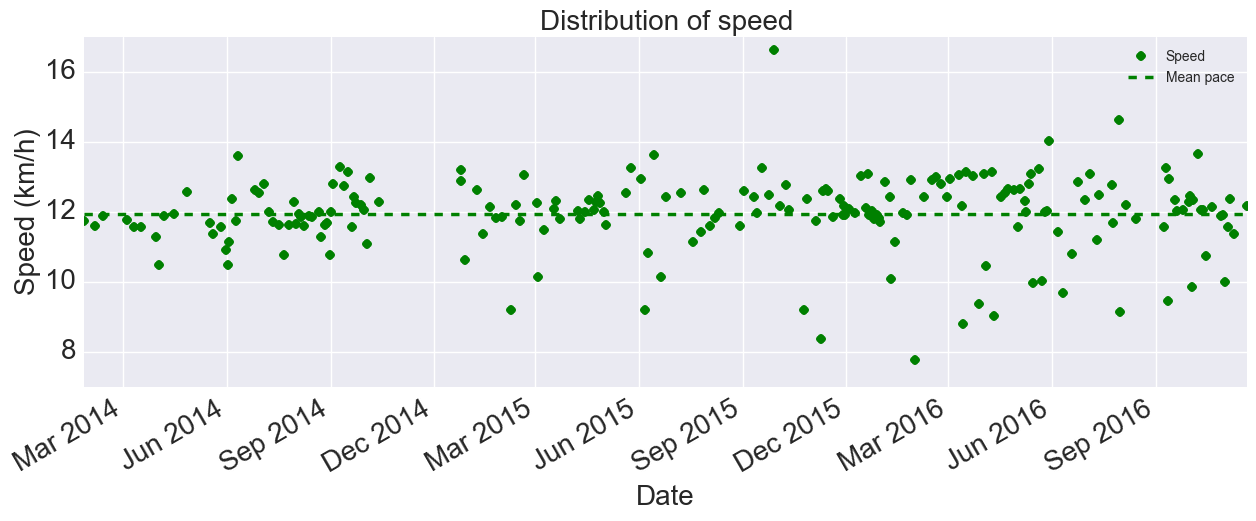

In [14]:
#Average Speed for running

avgspeed_run = pd.DataFrame()

avgspeed_run[['Date', 'Average Speed (km/h)']]  = Running_data[Running_data['Date'] > datetime(2013,12,31) ][['Date',
                                                                                    'Average Speed (km/h)']].dropna()

avgspeed_run.set_index('Date', inplace = True)


ax = avgspeed_run.plot(marker='o', linestyle = 'None', color = 'green',figsize = (15,5))

avgspeed_run_mean = avgspeed_run['Average Speed (km/h)'].mean()
ax.axhline(avgspeed_run_mean, color='g', linestyle='--',linewidth = 2.5,label = 'Mean pace - running')


ax.set_title('Distribution of speed', fontsize = font_size)
ax.tick_params(axis='both', which='major', labelsize=font_size)

ax.set_ylabel('Speed (km/h)', fontsize = font_size)
ax.set_xlabel('Date',fontsize = font_size)
ax.legend(['Speed','Mean pace'])
fig = ax.get_figure()

### Correlation between time and distance

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


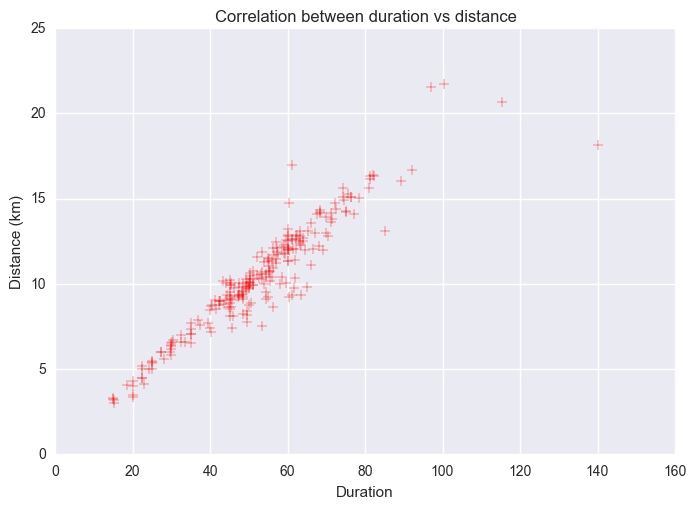

In [15]:
plt.scatter(x=Running_data[['Duration']],y=Running_data[['Distance (km)']],marker='+',color='r',s=60)
plt.xlabel('Duration')
plt.ylabel('Distance (km)')
plt.title('Correlation between duration vs distance')

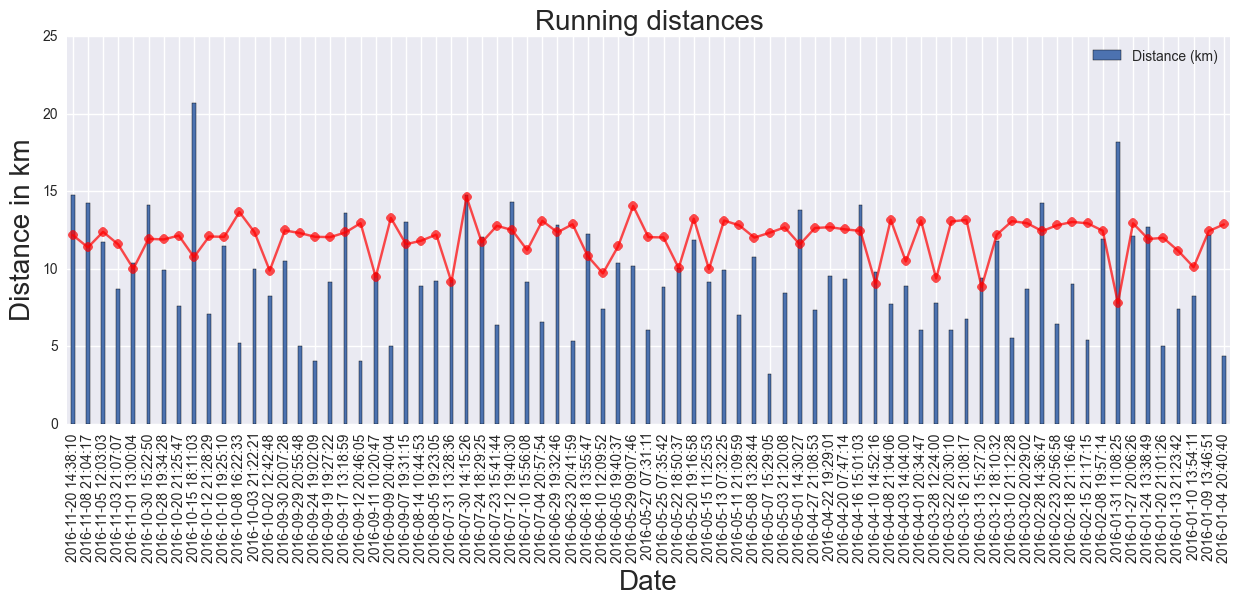

In [17]:
Run_2016 = Running_data[ (Running_data['Date'] >= datetime(2016,1,1) ) ][['Date','Distance (km)','Average Speed (km/h)']]

Run_2016.set_index('Date',inplace=True)

fig, axes = plt.subplots()
plt.hold(True)
Run_2016[['Distance (km)']].plot(kind='bar',legend = True,width =0.25, figsize = (15,5),ax=axes,stacked=True)

axes.plot(Run_2016['Average Speed (km/h)'], color='r', marker='o', ls='-', alpha=.7)


axes.set_xlabel('Date', fontsize = 20)
axes.set_ylabel('Distance in km',fontsize = 20)
axes.set_title('Running distances', fontsize = 20)
plt.show()

### Correlation between climb and average speed
Here I don't take into consideration data with climb equals 0: it's data I put manually on Runkeeper (to report my sessions at the gym)

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


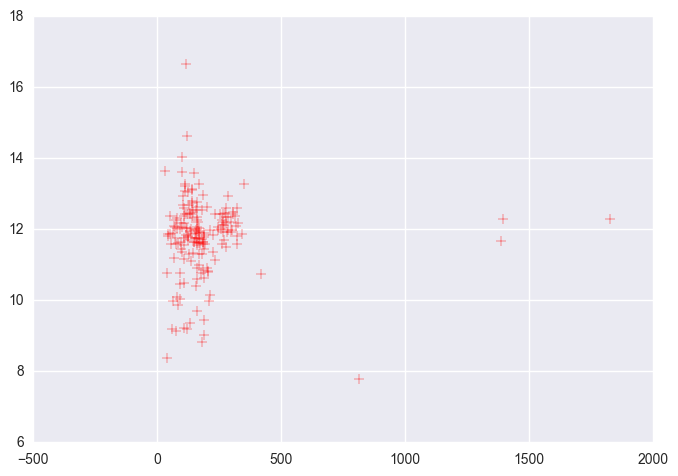

In [18]:
plt.scatter(x=Running_data[ (Running_data['Climb (m)'] > 0) ][['Climb (m)']],
            y=Running_data[ (Running_data['Climb (m)'] > 0) ][['Average Speed (km/h)']],
            marker='+',color='r',s=60)

## MAP GENERATION
Generate the map of my running sessions. First zoom in on Paris

In [19]:
import gpxpy
# Go through gpx files to get coordinates of running sessions
import os
location_data = pd.DataFrame(columns=['lat','lon','datetime'])
lat = []
lon = []
time = []

for file in os.listdir('/Users/voodoo4/Google Drive/Documents Appart/Random/runkeeper-data-export-11804375-2016-11-21-1427'):
     if file.endswith('.gpx'):
        gpx_file = open('/Users/voodoo4/Google Drive/Documents Appart/Random/runkeeper-data-export-11804375-2016-11-21-1427/'+file, 'r')
        gpx = gpxpy.parse(gpx_file)
        for track in gpx.tracks:
            for segment in track.segments:
                for point in segment.points:
                    lat.append(point.latitude)
                    lon.append(point.longitude)
                    time.append(point.time)
location_data['lat'] = lat
location_data['lon'] = lon
location_data['datetime'] = time
del lat,lon,time

In [21]:
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

loc_data = [tuple(x) for x in location_data[['lat','lon']].values]

# Focus on Paris coordinates
map_osm = folium.Map(location=[48.8566101, 2.3514992],zoom_start=12,tiles="Stamen Terrain")
HeatMap(loc_data,min_opacity=15,radius=7).add_to(map_osm)

map_osm.save('Heatmap.html')

map_osm